In [1]:
#Imports
from zmqRemoteApi import RemoteAPIClient
import time
import numpy
from matplotlib import pyplot as plt

from scipy import stats

In [2]:
client = RemoteAPIClient()
sim = client.getObject('sim')
client.setStepping(True)
human = sim.getObject('./mannequin')
robot = sim.getObject('./UR10')
humanRightHand = sim.getObject('./mannequin/Group[2]')
robotTip = sim.getObject('./UR10/manipulationSphereBase/manipulationSphere')



Creating the random parameters

For the random parameters a gaussian distribution is used

In [3]:
def create_param(a,b):
    out = 0
    out = numpy.random.normal(a,b)
    if out < 0:
        out = 0
    
    return out

In [4]:
def send_signals():
    params = [create_param(2,2), create_param(1,0.25), create_param(0.2, 0.05), create_param(0.2, 0.1)]
    sim.setFloatSignal("humanWait", params[0]) # Humans are messy and lazy
    sim.setFloatSignal("robotWait", params[1]) # Robot usually waits for 1 second with little deviation
    sim.setFloatSignal("humanSpeed", params[2])
    sim.setFloatSignal("robotSpeed", params[3])

In [5]:
#log timestamps and distance for a simulation
def simulate():
    #send new parameters
    send_signals()

    sim.boolparam_display_enabled = False
    sim.intparam_speedmodifier = 100
    
    min = 100000000

    sim.startSimulation()

    startRobotPos = sim.getObjectPosition(robot,sim.handle_world)

    while (t := sim.getSimulationTime()) < 5:
        s = f'Simulation time: {t:.2f} [s]'
        pos1 = sim.getObjectPosition(robotTip,sim.handle_world)
        pos2 = sim.getObjectPosition(humanRightHand,sim.handle_world)
        dist = numpy.linalg.norm(numpy.subtract(pos1,pos2))
        if(dist<min):
            min = dist
        client.step()
    sim.stopSimulation()
    return min

In [6]:
def mc_sim(passes):
    minimums = []
    for i in range(0,passes):
        print(i)
        results = simulate()
        minimums.append(results)
        time.sleep(0.2)
    return minimums

IndexError: invalid index to scalar variable.

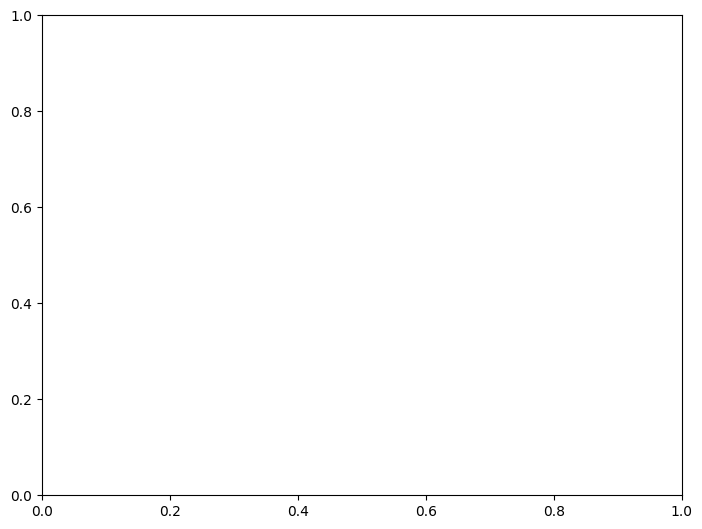

In [7]:
#Run a simple simulation and plot the distance
pass
results = simulate()
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(results[1], results[0])
ax.set_title("Line")

0
1
2
3
4


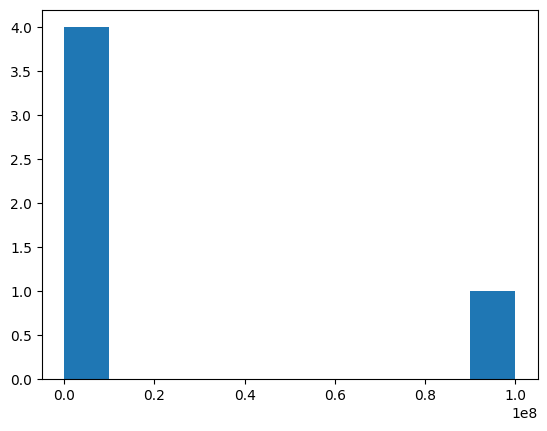

In [ ]:

sim.boolparam_display_enabled = False
mins = (mc_sim(5))
hist = plt.hist(mins)


In [ ]:
import json
with open('data.json', 'w') as f:
    json.dump(mins, f)

ValueError: The 'color' keyword argument must have one color per dataset, but 501 datasets and 1 colors were provided

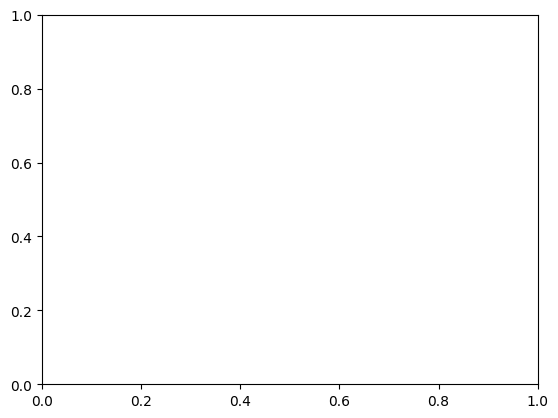

In [ ]:
n,bins,patch = plt.hist(mins,bins=20, color='green', alpha=0.8, label='Value')